<a href="https://colab.research.google.com/github/ankush07das/Machine-Learning-Projects-/blob/main/Gold%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Price Prediction of GOLD using Random Forest Classifier

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [5]:
gd =pd.read_csv('/content/gld_price_data.csv')

In [6]:
print(gd)

           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [7]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gd.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#getting the statistical description of data
gd.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Here on the above count means total number of data points , 25% , 50 % means that that percentage values are less than those mentioned values .

In [10]:
#Do the coorelation 1) Positive correlation 2) Negative correlation

#for positive correlation two variables are directly proportional and in negative correlation two variables are indirectly proportional
# Convert the 'Date' column to datetime objects
gd['Date'] = pd.to_datetime(gd['Date'])

# Extract numerical features from the 'Date' column if needed (e.g., year, month, day)
# gd['Year'] = gd['Date'].dt.year
# gd['Month'] = gd['Date'].dt.month
# gd['Day'] = gd['Date'].dt.day

# Now calculate the correlations, excluding the original 'Date' column if you extracted numerical features
correlation = gd.drop('Date', axis=1).corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

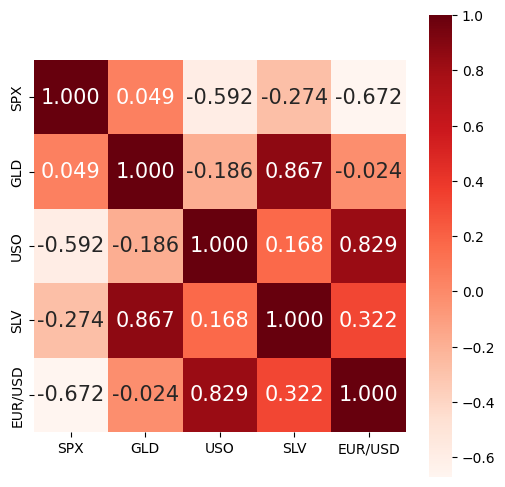

In [12]:
#Constructing the heatmap to understand correlation
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar =True,square=True,fmt='.3f',annot=True,annot_kws={'size':15}, cmap='Reds')
#here fmt = how many digits after floating point
#annot=True means the values which are displayed in the boxes and kwx size is the size of the letters in the objects

In [13]:
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


In [14]:
print(correlation['GLD'])
#the information obtained the correlation values with respect to gold which arer positively and which are negatively correlated

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [15]:
print(correlation['SLV'])

SPX       -0.274055
GLD        0.866632
USO        0.167547
SLV        1.000000
EUR/USD    0.321631
Name: SLV, dtype: float64


<ipython-input-16-1f53d365f32d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gd['GLD'],color='red')


<Axes: xlabel='GLD', ylabel='Density'>

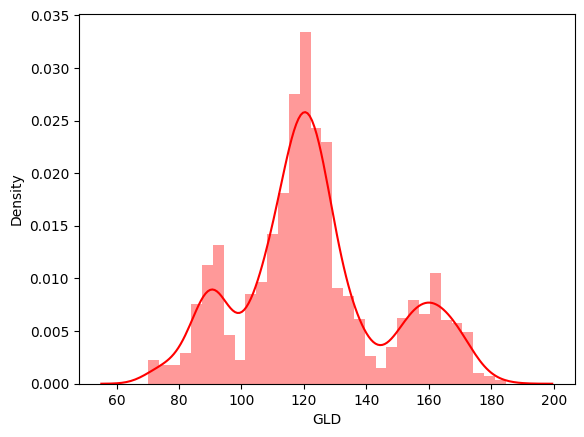

In [16]:
#checking the distribution of the gold price
sns.distplot(gd['GLD'],color='red')

<ipython-input-17-82382b447458>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gd['SLV'],color='green')


<Axes: xlabel='SLV', ylabel='Density'>

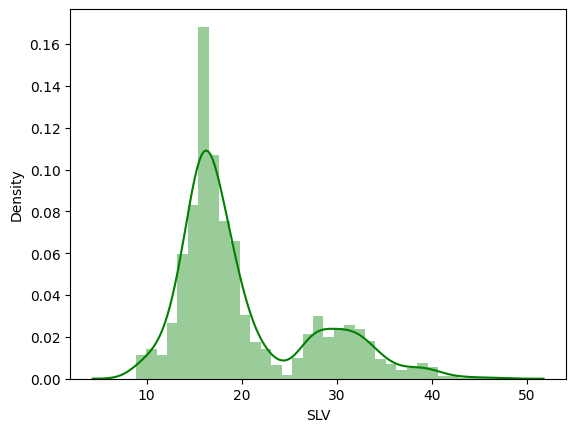

In [17]:
sns.distplot(gd['SLV'],color='green')

Splitting targets and values
when we want to remove column we have to give axis = 1 and to remove row we have to set axis = 0

In [18]:
X= gd.drop(['Date','GLD'],axis =1)
Y=gd['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the testing and Training data

In [21]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
print(X_train)

              SPX        USO        SLV   EUR/USD
476   1138.500000  39.790001  16.889999  1.361693
1958  2202.939941  10.630000  15.800000  1.063886
248    700.820007  24.480000  12.770000  1.256408
2231  2656.000000  11.890000  15.570000  1.225280
1325  1838.880005  33.040001  19.420000  1.366998
...           ...        ...        ...       ...
1071  1409.150024  32.320000  32.980000  1.287515
433   1132.989990  40.270000  17.230000  1.442398
674   1286.119995  38.610001  27.389999  1.357276
1099  1461.890015  33.919998  29.180000  1.306745
1608  2092.429932  18.500000  15.600000  1.057295

[1832 rows x 4 columns]


In [23]:
print(X_test)

              SPX        USO        SLV   EUR/USD
903   1351.949951  38.330002  32.900002  1.324854
129   1271.510010  93.900002  13.450000  1.472581
1787  1880.050049   8.910000  14.340000  1.119996
1913  2181.300049  10.960000  18.620001  1.127142
2048  2352.949951  10.680000  17.320000  1.067247
...           ...        ...        ...       ...
923   1370.869995  41.090000  33.220001  1.327492
1693  1952.290039  14.930000  13.990000  1.129089
2054  2349.010010  11.060000  17.430000  1.064453
658   1273.849976  37.680000  28.420000  1.315686
376   1057.579956  35.959999  17.250000  1.478131

[458 rows x 4 columns]


In [ ]:
#Model testing and regressor

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
regressor.fit(X_train , Y_train)

RandomForestRegressor()

Maling predictions

In [28]:
predictions= regressor.predict(X_test)

Calculating the model accuracy

In [33]:
error = metrics.r2_score(Y_test,predictions)
print(error)

0.9891330486224641


Plotting graphically along with Predicted as well as tested value

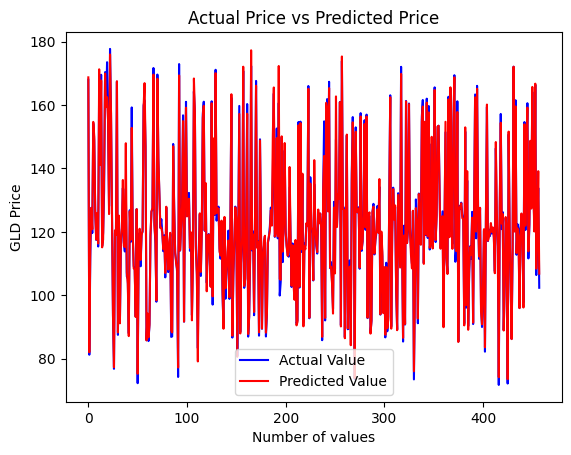

In [37]:
Y_test=list(Y_test)
plt.plot(Y_test,color= 'blue',label='Actual Value')
plt.plot(predictions,color='red',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()